In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
df=df.drop(["Cabin"],axis=1)

In [8]:
df['Age']=df['Age'].replace(np.nan,df['Age'].mean())

In [9]:
df = df.dropna(subset=['Embarked'])

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

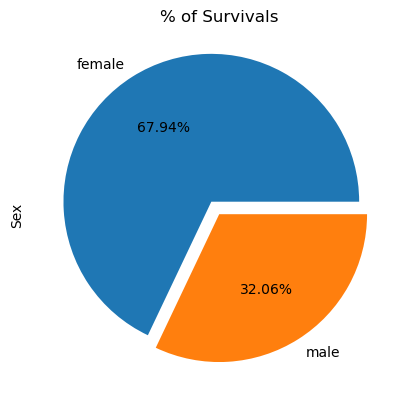

In [12]:
df_m = df[(df["Survived"] == 1) & (df["Sex"] == "male")]
df_f = df[(df["Survived"] == 1) & (df["Sex"] == "female")]
df_sur = pd.concat([df_m, df_f])
df_sur["Sex"].value_counts().plot.pie(explode=[0.1, 0], autopct="%0.2f%%")
plt.title("% of Survivals")
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

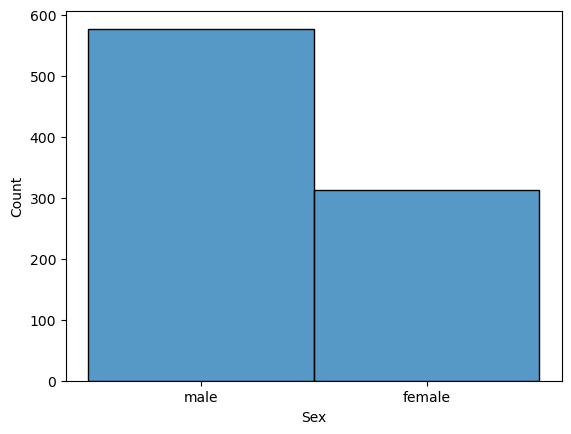

In [13]:
sns.histplot(data=df, x="Sex")

<AxesSubplot:ylabel='Pclass'>

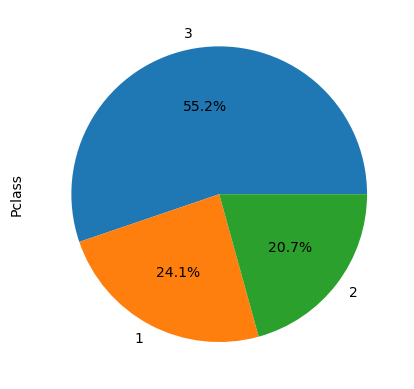

In [14]:
df["Pclass"].value_counts().plot.pie(autopct="%1.1f%%")

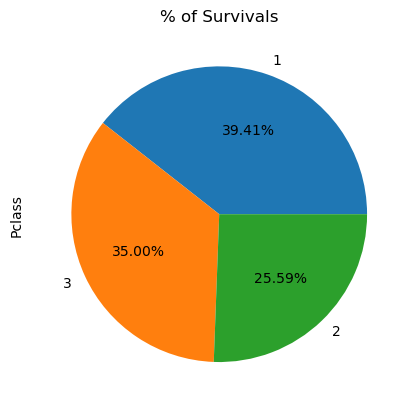

In [15]:
df_1 = df[(df["Survived"] == 1) & (df["Pclass"] == 1)]
df_2 = df[(df["Survived"] == 1) & (df["Pclass"] == 2)]
df_3 = df[(df["Survived"] == 1) & (df["Pclass"] == 3)]
df_sur = pd.concat([df_1, df_2, df_3])
df_sur["Pclass"].value_counts().plot.pie( autopct="%0.2f%%")
plt.title("% of Survivals")
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

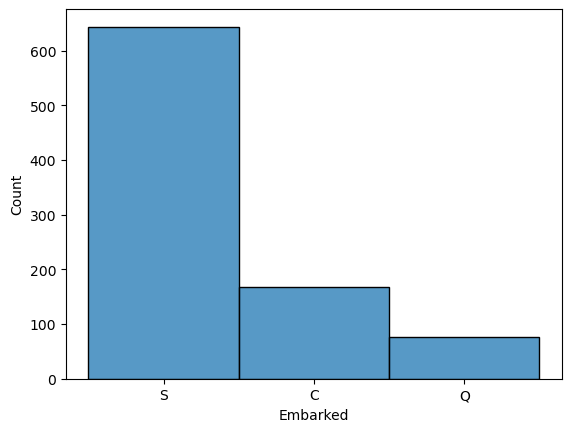

In [16]:
sns.histplot(data=df, x="Embarked")

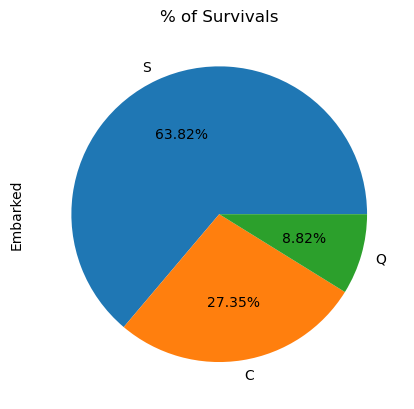

In [17]:
df_1 = df[(df["Survived"] == 1) & (df["Embarked"] == 'S')]
df_2 = df[(df["Survived"] == 1) & (df["Embarked"] == 'C')]
df_3 = df[(df["Survived"] == 1) & (df["Embarked"] == 'Q')]
df_sur = pd.concat([df_1, df_2, df_3])
df_sur["Embarked"].value_counts().plot.pie( autopct="%0.2f%%")
plt.title("% of Survivals")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

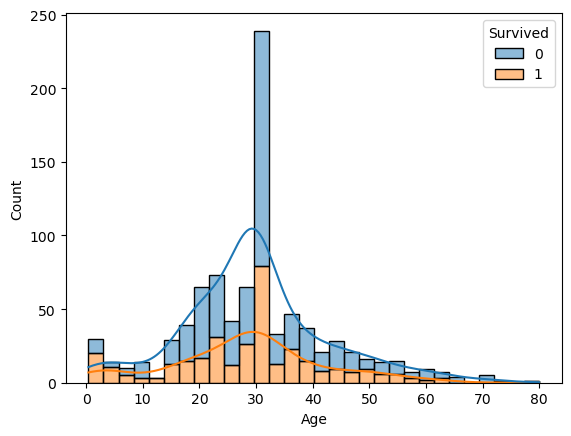

In [18]:
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", kde=True)